# <h1 style="text-align:center;font-size:30px;" >Minor Project </h1>

<h1 style="text-align:center;font-size:30px;" > Quora Question Similarity </h1>

## MACHINE LEARNING : An Introduction

In the modern world, where humans rely hugely upon various products and services offered by various businesses, data plays an important role handling these activities.
Data now is more valuable than currency because if utilized in the right way it can reap huge profits to businesses and save considerable amount of time.
To leverage the advantages of data generated in almost all the domains, it’s required to use new age technology like Machine Learning.

Machine learning is a sub field of artificial intelligence. The goal of machine learning generally is to understand the structure of data and fit that data into models that can be understood and utilized.
Although machine learning is a field within computer science, it differs from traditional computational approaches. In traditional computing, algorithms are sets of explicitly programmed instructions used by computers to calculate or problem solve. Machine learning algorithms instead allow for computers to train on data inputs and use statistical analysis in order to output values that fall within a specific range. Because of this, machine learning facilitates computers in building models from sample data in order to automate decision-making processes based on data inputs.

 ### ABOUT THE DOMAIN

Quora is an interactive platform where people can post various questions and any individual having knowledge about the question can give an answer thus solving doubts and queries online.

### PROBLEM STATEMENT

Whenever two or more questions are asked which are almost similar semantically but differ in the text, the questions may be posted more than once. 
So the answers are distributed among these questions and all the answers are not at one place. Information is scattered. 
It requires answering the same question more than once. 
So it’s required to find the duplicates and merge them under one type so that all the answers are stacked upon in one place.

### OBJECTIVE

To predict the similarity of two or more questions using a binary classification algorithm.


### APPROACH

This business problem can be mapped to a machine learning problem.
In machine learning we can solve such problems of predicting discrete instances using a classification algorithm.
But the data requires pre processing,feature engineering and Vectorization .

Pre Processing:
Since the data is in natural English language with punctuation,html tags,short forms,numbers etc we have to preprocess the data to remove all of them.

Feature Engineering:
As we can’t draw a lot of knowledge from the dataset, feature engineering should be applied to create some new useful features.

Vectorization:
And we can use Natural Language Processing to convert the text to vector so that we can leverage the properties of vectors to apply machine learning algorithms.

After completing all the above mentioned methods we can apply any classification algorithms like Naive Bayes,Logistic Regression,Support Vector Machines etc.


### Functional Requirements:


1. Probability of the similarity between the questions has to be determined to set a threshold to classify the given test data.
2. Error due to misclassification should be very low. If there is a misclassification we might end up considering two different questions similar thus providing wrong answers to a query.
3. No latency requirement as the model can take a few seconds to search for the similar questions.
4. Interpretability(On what grounds our model made the classification) is not much important.

### Performance Metrics:

Log Loss and Confusion Matrix

We use log loss because it uses probability scores of our predicted class labels to evaluate performance.

## Exploring the dataset

#### importing required libraries

In [1]:
import os
import warnings  # to filter warnings which is quite annoying to look at.
# To perform various mathematical operations and tools to operate on nd arrays
import numpy as np
import pandas as pd  # To import and analyze data
import matplotlib.pyplot as plt  # for visualisation
import seaborn as sns  # for visualisation
import pickle  # To save data or python objects from primary memory to disk and store it in a binary format vice versa
# Natural language processing toolkit used for vectorisation and preprocesssing data.
import nltk
%matplotlib inline
# Output of plotting commands to be displayed inline in the jupyter notebook.
warnings.filterwarnings('ignore')

#### Importing the dataset

In [2]:
dataset = pd.read_csv("train.csv")

#### Dispalying few rows of data

In [3]:
dataset.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


##### Observation
We can see that there are 6 columns
1. Id
2. qid1 - id of the first question
3. qid 2 - id of the second question
4. Question1 - Textual data of the first question
5. Question2 - Textual data of the second question
6. Is_duplicate - A binary class label [0 if the questions are different and 1 if the questions are similar]

In [4]:
dataset.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


##### Observtion
There are 404290 rows in our dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


##### Observation
We can conclude that there are no null values in our data except the quesion2 column which has 2 nulls.

### Quantitative analysis of class labels

In [6]:
dataset["is_duplicate"].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

##### Observation
We can observe that 149263 question pairs out of 404290 question pair are similar and the rest 255027 pairs are dissimilar.

##### A plot to visualise the above figure

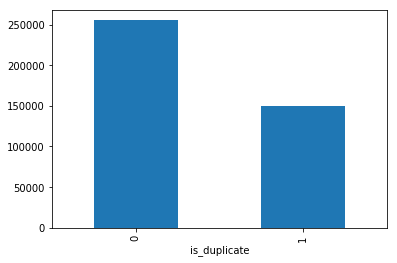

In [7]:
dataset.groupby("is_duplicate")['id'].count().plot.bar()

#### Percentage estimate

In [8]:
print("Percentage of question pairs that are similar[is_duplicate = 1]:\t {}%".format(
    dataset["is_duplicate"].mean()*100))

Percentage of question pairs that are similar[is_duplicate = 1]:	 36.9197853026293%


In [9]:
print("Percentage of question pairs that are not similar[is_duplicate = 0]:\t {}%".format(
    100-dataset["is_duplicate"].mean()*100))

Percentage of question pairs that are not similar[is_duplicate = 0]:	 63.0802146973707%


### Number of unique questions

In [10]:
qids = pd.Series(dataset['qid1'].tolist() + dataset['qid2'].tolist())
print('Total number Unique of questions in the training data: {}'.format(
    len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(
    np.sum(qids.value_counts() > 1)))

Total number Unique of questions in the training data: 537933
Number of questions that appear multiple times: 111780


### Duplicates

In [11]:
dupli = dataset[dataset.duplicated()]

In [12]:
dupli.count()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

##### Observation
We can see that there aren't any duplicates in our dataset

#### Null values

In [13]:
nan_rows = dataset[dataset.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


#### Dropping nulls

In [14]:
dataset = dataset.dropna(how="any")

In [15]:
nan_rows = dataset[dataset.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


## Feature Engineering

### Basic Feature Engineering

Creating the following features from the existing ones.
1. freq(qid1) - frequency of qid1
2. freq(qid2) - frequency of qid2
3. len(q1) - length of question1
4. len(q2) - length of question2
5. words(q1) - number of words in question1
6. words(q2) - number of words in question2
7. words(common) - number common words in question1 and question2
8. word_total - total number of words in question1 and question2
9. word_share - words(common)/word_total
10. freq(qid1)+freq(qid2) - sum of total frequency qid1 and qid2
11. freq(qid1)-freq(qid2) - absolute differnce in the frequencies in qid1 and qid2

In [16]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dataset = pd.read_csv(
        "df_fe_without_preprocessing_train.csv", encoding='latin-1')
else:
    # Calculatint the frequency of the questions in the dataset
    dataset['freq_qid1'] = dataset.groupby('qid1')['qid1'].transform('count')
    dataset['freq_qid2'] = dataset.groupby('qid2')['qid2'].transform('count')

    # Calculating the length of each question.
    dataset['q1len'] = dataset['question1'].str.len()
    dataset['q2len'] = dataset['question2'].str.len()

    # Calculating the numver
    dataset['q1_n_words'] = dataset['question1'].apply(
        lambda row: len(row.split(" ")))
    dataset['q2_n_words'] = dataset['question2'].apply(
        lambda row: len(row.split(" ")))

    # Function to calculate number of common words
    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(),
                     row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(),
                     row['question2'].split(" ")))
        return 1.0 * len(w1 & w2)
    dataset['word_Common'] = parse(
        dataset.apply(normalized_word_Common, axis=1))

    # Function to calaculate total words in both the questions
    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(),
                     row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(),
                     row['question2'].split(" ")))
        return 1.0 * (len(w1) + len(w2))
    dataset['word_Total'] = dataset.apply(normalized_word_Total, axis=1)

    # Function to calculate word share
    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(),
                     row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(),
                     row['question2'].split(" ")))
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    dataset['word_share'] = dataset.apply(normalized_word_share, axis=1)

    # Calaculating the sum of frequencies of both the questions
    dataset['freq_q1+q2'] = dataset['freq_qid1']+dataset['freq_qid2']
    # Calaculating the sum of frequencies of both the questions
    dataset['freq_q1-q2'] = abs(dataset['freq_qid1']-dataset['freq_qid2'])

    # Creating a csv file
    dataset.to_csv("df_fe_without_preprocessing_train.csv", index=False)

dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


### Exploring the newly created features

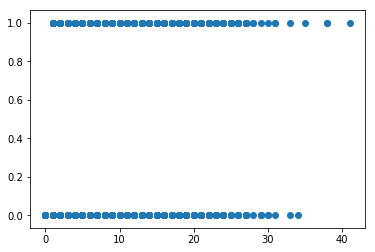

In [17]:
plt.scatter(dataset["word_Common"], dataset["is_duplicate"])

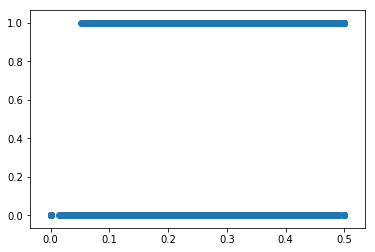

In [18]:
plt.scatter(dataset["word_share"], dataset["is_duplicate"])

No proper inference can be drawn from these plots. Thus the above created features aren't enough to predict the classes. We need some more features which work well on our data.

### Applying TSNE to visualise our multi-dimensional data in a 2D space

In [23]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

sub = dataset[0:5000]
X = MinMaxScaler().fit_transform(sub[["freq_qid1", "freq_qid2", "q1len", "q2len", "q1_n_words",
                                      "q2_n_words", "word_Common", "word_Total", "word_share", "freq_q1+q2", "freq_q1-q2"]])
y = sub['is_duplicate'].values

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 0.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.031461
[t-SNE] Computed conditional probabilities in 0.554s
[t-SNE] Iteration 50: error = 83.4062042, gradient norm = 0.0372416 (50 iterations in 6.369s)
[t-SNE] Iteration 100: error = 73.0325928, gradient norm = 0.0053503 (50 iterations in 4.339s)
[t-SNE] Iteration 150: error = 71.5993347, gradient norm = 0.0026103 (50 iterations in 4.353s)
[t-SNE] Iteration 200: error = 71.0988312, gradient norm = 0.0011873 (50 iterations in 4.302s)
[t-SNE] Iteration 250: error = 70.9027634, gradient norm = 0.0014565

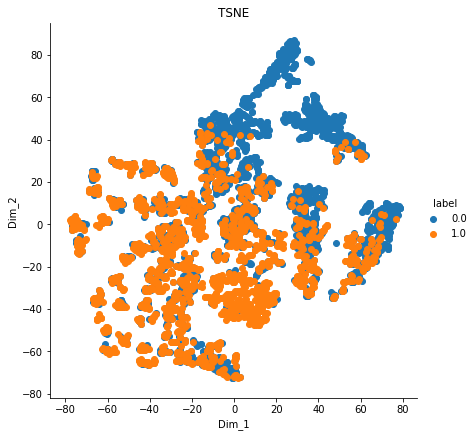

In [30]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=2,
    init='random',  # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne3d.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(
    plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE")
plt.show()

##### As observed in the above plot we can see that our data points overlap a lot. There is no clear seperation between the positive and negative class points. Thus we require additional features which can best fit the data for classification

##  Preprocessing data

Since the data is in natural English language with punctuation,html tags,short forms,numbers etc we have to preprocess the data to remove all of them.

In [68]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")

In [69]:
import re  # To deal with regular expressions
from bs4 import BeautifulSoup  # To remove html tags
from fuzzywuzzy import fuzz  # For Feature Engineerig
import distance  # To calculate similar length of similar substrings
from nltk.stem import PorterStemmer  # For Stemming

SAFE_DIV = 0.0001  # To prevent division by zero


def decontracted(phrase):

    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"([0-9]+)000000", r"\1m", phrase)
    phrase = re.sub(r"([0-9]+)000", r"\1k", phrase)
    return phrase


def porter(x):
    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
    return x


def preprocessed(sent):
    sentance = re.sub(r"http\S+", "", sent)
    sentance = BeautifulSoup(sent, 'lxml').get_text()
    sentance = decontracted(sent)
    sentance = re.sub("\S*\d\S*", "", sent).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sent)
    sentance = porter(sent)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    return(sentance.strip())

## Advanced Feature Engineering

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [70]:
def get_token_features(q1, q2):
    token_features = [0.0]*10

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in stopwords])
    q2_words = set([word for word in q2_tokens if word not in stopwords])

    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stopwords])
    q2_stops = set([word for word in q2_tokens if word in stopwords])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / \
        (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / \
        (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / \
        (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / \
        (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / \
        (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / \
        (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string


def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)


def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocessed)
    df["question2"] = df["question2"].fillna("").apply(preprocessed)

    print("creating token features...")

    # Merging Features with dataset

    token_features = df.apply(lambda x: get_token_features(
        x["question1"], x["question2"]), axis=1)

    df["cwc_min"] = list(map(lambda x: x[0], token_features))
    df["cwc_max"] = list(map(lambda x: x[1], token_features))
    df["csc_min"] = list(map(lambda x: x[2], token_features))
    df["csc_max"] = list(map(lambda x: x[3], token_features))
    df["ctc_min"] = list(map(lambda x: x[4], token_features))
    df["ctc_max"] = list(map(lambda x: x[5], token_features))
    df["last_word_eq"] = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"] = list(map(lambda x: x[8], token_features))
    df["mean_len"] = list(map(lambda x: x[9], token_features))

    # Computing Fuzzy Features and Merging with Dataset

    print("creating fuzzy features..")

    df["token_set_ratio"] = df.apply(
        lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"] = df.apply(
        lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"] = df.apply(lambda x: fuzz.QRatio(
        x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"] = df.apply(
        lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"] = df.apply(
        lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [71]:
if os.path.isfile('newfeaturestrain.csv'):
    df = pd.read_csv("newfeaturestrain.csv", encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("newfeaturestrain.csv", index=False)
df.head(2)

Extracting features for train:
creating token features...
creating fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.799984,0.666656,0.999983,0.999983,...,0.714281,0.0,1.0,2.0,13.0,100,93,93,98,0.965517
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,0.499988,0.222220,0.666644,0.499988,...,0.307690,0.0,1.0,5.0,10.5,86,63,66,75,0.576923


#### EDA on the new dataset

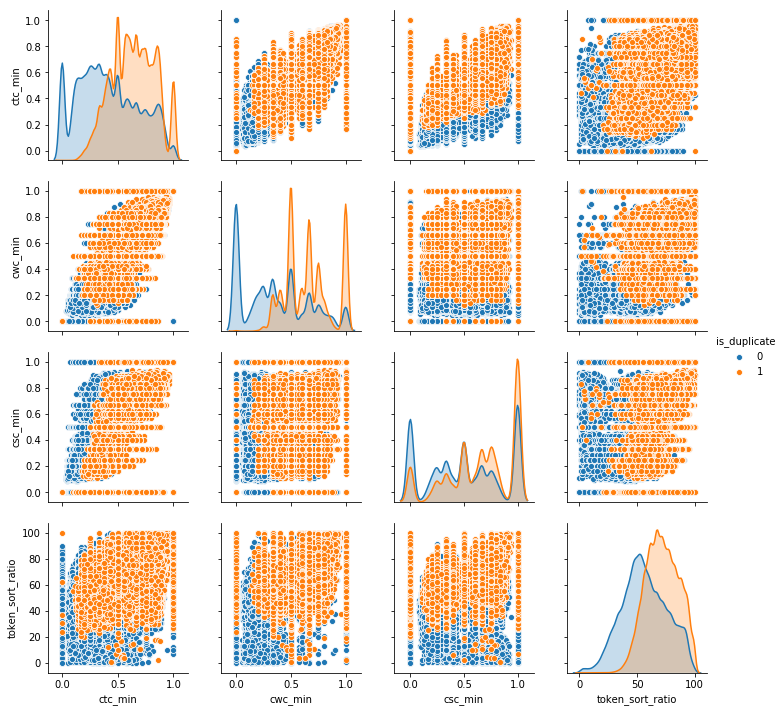

In [72]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']]
             [0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

##### Observation
From the pairplot, we can see that for some values of the features, data points are linearly seperable.
Bi Variate analysis:
1. When the token_sort_ratio is less than 20 and ctc_min is less than 1.0 we can see a lot of positive points in that region.
2. When the token_sort_ratio is less than 20 and cwc_min is less than 0.5 a lot of positive points are observed in that region.
3. When the token_sort_ratio is less than 20 and csc_min is less than 0.5 a lot of positive points are observed in that region.
Uni variate analysis:
1. When ctc_min < 0.3 all the data points belong to positive class
2. When cwc_min < 0.3 all the data points belong to positive class

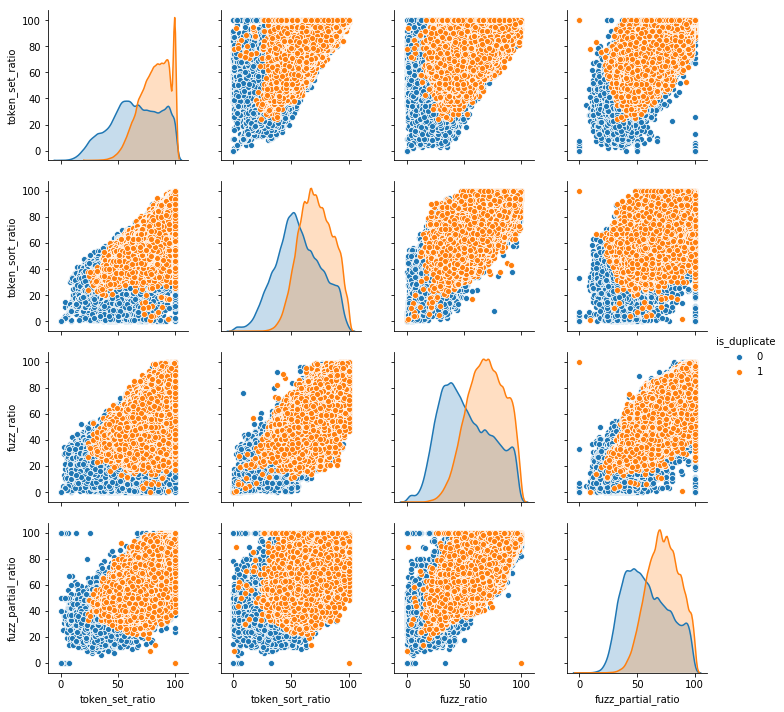

In [74]:
n = df.shape[0]
sns.pairplot(df[['token_set_ratio', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'is_duplicate']]
             [0:n], hue='is_duplicate', vars=['token_set_ratio', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio'])
plt.show()

##### Observation
We can observe from the above plot, the features obtained by fuzzy wuzzy technque seperates the data points a lot better when compared to other features in the previous pair plot.

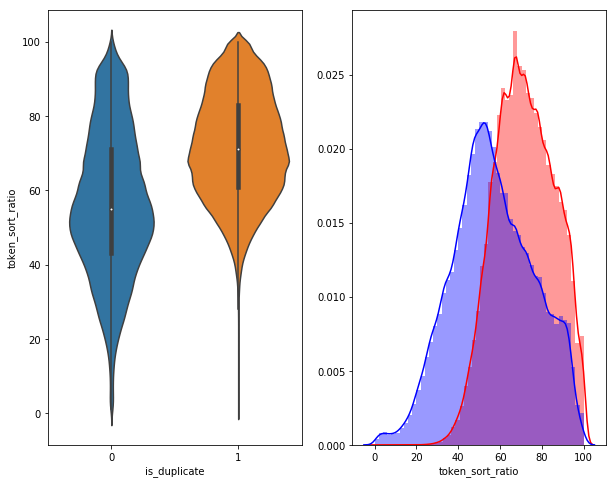

In [75]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.violinplot(x='is_duplicate', y='token_sort_ratio', data=df[0:], )

plt.subplot(1, 2, 2)
sns.distplot(df[df['is_duplicate'] == 1.0]
             ['token_sort_ratio'][0:], label="1", color='red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio']
             [0:], label="0", color='blue')
plt.show()

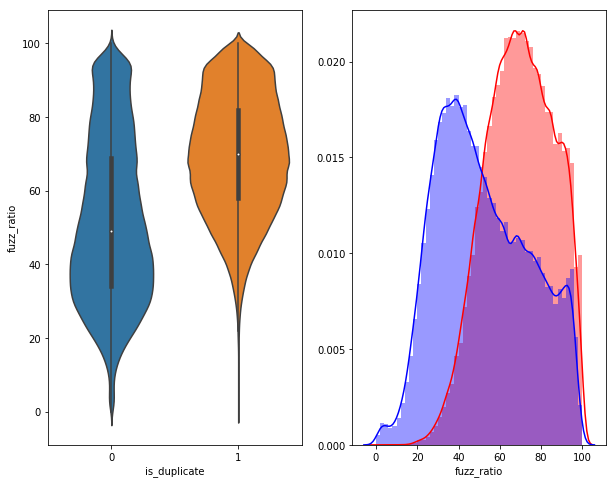

In [76]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.violinplot(x='is_duplicate', y='fuzz_ratio', data=df[0:], )

plt.subplot(1, 2, 2)
sns.distplot(df[df['is_duplicate'] == 1.0]
             ['fuzz_ratio'][0:], label="1", color='red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio']
             [0:], label="0", color='blue')
plt.show()

#####  Observation
From the above 2 plots we can observe that our fuzzy wuzzy features makes our data linearly seperable to some extent.

With all the Exploratory data analysis and observations we can conclude that the features which  were derived from fuzzywuzzy technique helps in classifying our data better.

#### TSNE on the new dataset

In [77]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

df_sub = df[0:5000]
X = MinMaxScaler().fit_transform(df_sub[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
                                         'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',  'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio']])
y = df_sub['is_duplicate'].values

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.009s...
[t-SNE] Computed neighbors for 5000 samples in 0.313s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.125152
[t-SNE] Computed conditional probabilities in 0.189s
[t-SNE] Iteration 50: error = 80.9818954, gradient norm = 0.0426881 (50 iterations in 2.433s)
[t-SNE] Iteration 100: error = 70.4365234, gradient norm = 0.0100768 (50 iterations in 1.570s)
[t-SNE] Iteration 150: error = 68.6730042, gradient norm = 0.0058672 (50 iterations in 1.569s)
[t-SNE] Iteration 200: error = 67.8444824, gradient norm = 0.0039360 (50 iterations in 1.591s)
[t-SNE] Iteration 250: error = 67.3734818, gradient norm = 0.0030796

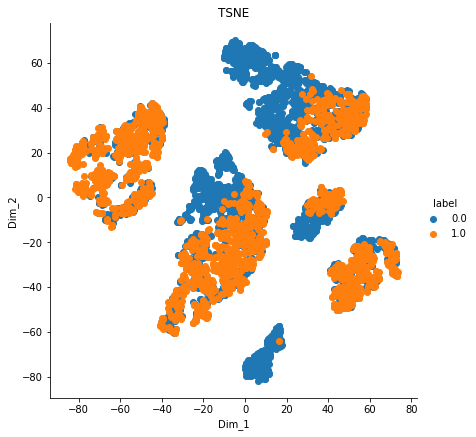

In [78]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=2,
    init='random',  # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne3d.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(
    plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE")
plt.show()

##### Observation
Now we can observe that our positive and neagtive class points are better seperated with the addition of all the new features.